Este notebook foi para utilizar a plataforma do pytrends para conseguir as principais pesquisas do dia, pois queria mostrar uma bag of words das procuras antes e depois do decreto da quarentena, mas não consegui porque a função top_charts que fazia isso não foi mais permitida usar. Enfim, fiz apenas um gráfico de linha para plotar quantidade de vezes que foi pesquisada uma determinada palavra.

# 1. pytrend's documentation

Referência
+ instalar pytrends : https://pypi.org/project/pytrends/
+ How to use Python & Pytrens: https://www.honchosearch.com/blog/seo/how-to-use-python-pytrends-to-automate-google-trends-data/ 
+ Celso Casto Youtube : https://www.youtube.com/watch?v=VCVxjNpM0gg&feature=emb_title&ab_channel=CelsoCestaro      
+ Get Google Trends Using Python: https://predictivehacks.com/get-google-trends-using-python/
+ https://towardsdatascience.com/tracking-coronavirus-engagement-with-google-trends-in-python-5a4b08bc6977

+ **TrendReq()**: conection at Google Trend's
+ **build_payload()**
+ **interest_over_time()** : returns historical, indexed data for when the keywords was searched most as shown on Google Trend's interest over time section;
+ **historical_hourly_interest()**: returns historical, indexed, hourly data for when the keywords was searched most as shown on Google Trend's interest over time section. It sends multiple requests to Google, Trend's one week of hourly data. It seems like this would be the only way to get historical, hourly data.
+ **interest_by_region()**: returns data for where the keyword is most searched as shown on Google Trend's interest by Region section.
+ **related_topics()**: returns data for the related keywords to a provided keyword shown on Google Trend's Related Topics section.
+ **related_queries()**: returns data for the related keywords to a provided keywords shown on Google Trend's Querie section.
+ **trending_searches()**: returns data for latest trending seaches shown on Google Trend's Trending Searching section.
+ **top_charts()**: returns the data for a given topic shown in Google Trends' Top Charts section.
+ **suggestions()**: returns a list of additional suggested keywords that can be used to refine a trend search.

+ Params: 
    + **tz** = timezone offset -> CST 360;
    + **proxies** = https proxies Google passed ONLY -> ['https://34.203.233.13:80'];
    + **retires** = number of retries total/connect/read all represented by one scalar;
    + **backoff_factor** = action beetween attempts after the second try -> urllib3 will sleep for... seconds;
    + **request_args** = a dict with addictional parameters to pass along to the underlying request library,for example verify=False to ignore SSL errors. 
    + **kw_list** = keywords to get data for -> ['Pizza','Italian','Spaghetti'] 
    + **cat** = category narrow results
        + Find available categories by inspecting the url when manually using Google Trends. The category starts after;
          cat= and ends before the next & or view this wiki page containing all avaliable categories;
        + For example: "https://www.google.com/trends/explore#q=pizza&cat=71";
        + '71' is the category;
        + Defaults to no category.
    + **geo** = Two letter country abbreviation
        + For example United States is 'US';
        + Defaults to World;
        + More detail avaliable for States/Provinces by specifying additional abbreviations;
        + For example: Alabama would be 'US-AL';
        + For example: England would be 'GB-ENG'.
    + **tz** = Timezone Offset (in minutes)
        + For example US CST is '360'
    + **timeframe** = data to start from
        + Defaults to last 5 yrs, 'today 5-y';
        + Defaults to last 3 months 'today 3-m';
        + Defaults to daily 'now #-d';
        + Defaults to 'now 7-d';
        + Seems to only work for 1,4 hours only 'now 1-H';
        + Everything 'all';
        + Specific dates, 'YYYY-MM-DD YYYY-MM-DD' example '2016-12-14 2017-01-25'.
    + **gprop** = What Google property to filter to
        + Example 'images';
        + Defaults to web searches;
        + Can be images, news, youtube or froogle(for Google Shopping results).
    + **sleep** = if you are rate-limited by Google, you should set this parameter to something (i.e. 60) to space off
           each API call.
    + **resolution** =
         + 'CITY' returns city level data;
         + 'COUNTRY' returns country level data;
         + 'DMA' returns Metro level data;
         + 'REGION' returns Region level data.
    + **inc_low_vol** = 
         + True/False(includes google trends data for low volume countries/regions as well)
    + **inc_geo_code** = 
         + True/False(includes ISO codes of countries along with the names in the data)

# 1. Importações necessárias

In [1]:
import json
import sympy
import pyodbc
import hashlib
import datetime
import warnings
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pytrends.request import TrendReq
from datetime import timezone, datetime, timedelta, date

warnings.filterwarnings('ignore')

# 2. Connecting at Google Trends

In [2]:
# Conecting at Google Trends
pytrends = TrendReq(hl='pt-BR', tz=300)

# Só consigo com anos
# pytrends.top_charts(201601,hl='pt-BR',tz=300,geo='GLOBAL')

# Todas as categorias pelo id
pytrends.categories()

{'children': [{'children': [{'children': [{'name': 'Animais domésticos exóticos',
       'id': 607},
      {'name': 'Cães', 'id': 886},
      {'name': 'Cavalos', 'id': 888},
      {'name': 'Coelhos e roedores', 'id': 889},
      {'name': 'Gatos', 'id': 885},
      {'name': 'Pássaros', 'id': 884},
      {'name': 'Peixe e aquário', 'id': 887},
      {'name': 'Répteis e anfíbios', 'id': 890}],
     'name': 'Animais de estimação',
     'id': 563},
    {'children': [{'name': 'Bem-estar animal', 'id': 883},
      {'name': 'Comida e suprimentos para animais de estimação', 'id': 379},
      {'name': 'Veterinários', 'id': 380}],
     'name': 'Produtos e serviços para animais',
     'id': 882},
    {'children': [{'name': 'Insetos e entomologia', 'id': 1278},
      {'name': 'Zoológicos, aquários, preservação', 'id': 1009}],
     'name': 'Vida selvagem',
     'id': 119}],
   'name': 'Animais de estimação e animais',
   'id': 66},
  {'children': [{'children': [{'name': 'Atuação e teatro', 'id': 894

# 3. Obtendo palavras mais pesquisadas hoje

In [3]:
print('Têndências do Dia: Hot Trends')
hoje_tendencia_df = pytrends.today_searches(pn='BR')
display(hoje_tendencia_df)

Têndências do Dia: Hot Trends


0                   Volei feminino
1         Flamengo x Internacional
2             Barcelona x Juventus
3          Juventude x Atlético-MG
4              Real Madrid x Milan
5                Dia dos Pais 2021
6          América-MG x Fluminense
7                              Pai
8               Fabiula Nascimento
9              Imagem Dia dos Pais
10                       Liverpool
11              Gabriela Guimarães
12                       Vila Nova
13              Mathias Villasanti
14                       Tottenham
15                     Pai e filho
16          Olympique de Marseille
17    Quem ganhou o vôlei feminino
18                           Porto
19                            Xamã
Name: query, dtype: object

# 4. Obtendo pesquisas por palavras

In [4]:
termo = ["Coronavírus","Covid-19","Sars Cov 2","Sars-Cov-2","Covid 19"]
pytrends.build_payload(kw_list = termo)
buscas_df = pytrends.interest_over_time()
buscas_df.drop('isPartial',axis=1)

,Coronavírus,Covid-19,Sars Cov 2,Sars-Cov-2,Covid 19
date,,,,,
2016-08-14,0,0,0,0,0
2016-08-21,0,0,0,0,0
2016-08-28,0,0,0,0,0
2016-09-04,0,0,0,0,0
2016-09-11,0,0,0,0,0
...,...,...,...,...,...
2021-07-04,0,5,0,0,13
2021-07-11,0,6,0,0,13
2021-07-18,0,6,0,0,14


# 5.  Palavras-chave próximas as outras

In [5]:
relacionadas_queries_dict = pytrends.related_queries()

print('*'*100)
print('*'*50,'Coronavírus','*'*40)
print('*'*100)
display(pd.DataFrame(relacionadas_queries_dict['Coronavírus']['top']))
display(pd.DataFrame(relacionadas_queries_dict['Coronavírus']['rising']))

print('*'*100)
print('*'*50,'Covid-19','*'*40)
print('*'*100)
display(pd.DataFrame(relacionadas_queries_dict['Covid-19']['top']))
display(pd.DataFrame(relacionadas_queries_dict['Covid-19']['rising']))

print('*'*100)
print('*'*50,'Sars Cov 2','*'*40)
print('*'*100)
display(pd.DataFrame(relacionadas_queries_dict['Sars Cov 2']['top']))
display(pd.DataFrame(relacionadas_queries_dict['Sars Cov 2']['rising']))

****************************************************************************************************
************************************************** Coronavírus ****************************************
****************************************************************************************************


,query,value
0,brasil coronavírus,100
1,coronavírus no brasil,59
2,coronavírus casos,39
3,coronavírus sintomas,37
4,coronavírus hoje,29
5,sintomas do coronavírus,27
6,coronavírus mundo,21
7,coronavírus mortes,21
8,corona virus,18
9,coronavírus no mundo,17


,query,value
0,coronavírus no brasil,706300
1,coronavírus casos,462800
2,coronavírus sintomas,441900
3,coronavírus hoje,351900
4,coronavírus mundo,257550
5,coronavírus mortes,247300
6,corona virus,213900
7,coronavírus no mundo,200650
8,casos coronavírus brasil,195700
9,coronavírus vacina,186600


****************************************************************************************************
************************************************** Covid-19 ****************************************
****************************************************************************************************


,query,value
0,covid,100
1,covid 19,47
2,coronavirus covid-19,42
3,covid-19 prevention,41
4,coronavirus,40
5,covid-19 vaccine,35
6,covid-19 cases,33
7,india covid-19,25
8,covid-19 news,25
9,covid-19 test,22


,query,value
0,covid,1068400
1,covid 19,505450
2,coronavirus covid-19,444350
3,covid-19 prevention,433750
4,coronavirus,428200
5,covid-19 vaccine,369950
6,covid-19 cases,350000
7,india covid-19,271650
8,covid-19 news,261750
9,covid-19 test,237350


****************************************************************************************************
************************************************** Sars Cov 2 ****************************************
****************************************************************************************************


,query,value
0,covid,100
1,covid sars cov 2,100
2,sars covid 2,98
3,covid 2,97
4,sars cov 19,61
5,covid 19,58
6,covid 19 sars cov 2,56
7,sars covid 19,56
8,test sars cov 2,44
9,sars cov 2 virus,41


,query,value
0,covid,1721600
1,covid sars cov 2,1716700
2,sars covid 2,1683200
3,covid 2,1667700
4,sars cov 19,1051900
5,covid 19,990000
6,covid 19 sars cov 2,970200
7,sars covid 19,960000
8,test sars cov 2,754050
9,sars cov 2 virus,712000


# 7. Obtenha sugestões de palavras por palavras-chave

In [6]:
sugestoes_dict = pytrends.suggestions(keyword=termo[0])
pd.DataFrame(data=sugestoes_dict).drop('mid',axis=1)

,title,type
0,Coronavírus,Vírus
1,COVID-19,Doença
2,Pandemia de COVID-19,Assunto
3,Coronavírus da síndrome respiratória aguda gra...,Vírus
4,Síndrome respiratória do Oriente Médio,Doença


# 8. Get number searches hourly by key words

Aqui eu peguei a quantidade de vezes que foi pesquisadas as palavras chaves que estão nas variáveis **kw_list** e **kw_list_2** horariamente em um determinado dia começando em 01/01/2020. Com isso, buscei com a função **get_historical_interest()** mensalmente(veja os parâmetros **moth_start** e **moth_end** são os únicos que muda no for, pois se eu tivesse puxado do sistema de uma vez não conseguira obter, então fui aos poucos e adicionando os resultados em um data frame.

In [9]:
# Create dataframe
df_words_corona = pd.DataFrame({})

# Key words list
kw_list   = ['Coronavirus','Sars-Cov-2','Covid-19','Síndrome respiratória do Oriente Médio']

# Get hourly by mothnly datasets
for i in range(1,13):
    if i!=2:
        df_words_corona = df_words_corona.append(pytrends.get_historical_interest(kw_list,
                                                                                  year_start= 2020,month_start= i,
                                                                                  day_start = 1,   hour_start = 0,
                                                                                  year_end  = 2020,month_end  = i,
                                                                                  day_end   = 30,  hour_end   = 23,
                                                                                  geo='BR', sleep=20),ignore_index=True)
    else:
        df_words_corona = df_words_corona.append(pytrends.get_historical_interest(kw_list,
                                                                                  year_start= 2020,month_start=i,
                                                                                  day_start = 1,   hour_start =0,
                                                                                  year_end  = 2020,month_end  =i,
                                                                                  day_end   = 29,  hour_end   =23,
                                                                                  geo='BR', sleep=20),ignore_index=True)
        
df_words_corona.drop('isPartial',axis=1,inplace=True)
df_words_corona

,Coronavirus,Sars-Cov-2,Covid-19,Síndrome respiratória do Oriente Médio
0,0,0,0,0
1,28,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8659,52,1,16,0
8660,57,0,15,0
8661,67,0,16,0
8662,78,0,18,0


In [12]:
# Create dataframe
df_words_corona_2 = pd.DataFrame({})

# Key words list
kw_list_2 = ['Coronavírus felino','Coronavírus humano 229E','Coronavírus humano OC43']

for i in range(1,13):
    if i!=2:
        df_words_corona_2 = df_words_corona_2.append(pytrends.get_historical_interest(kw_list_2,
                                                                                      year_start=2020, month_start=i,
                                                                                      day_start=1,  hour_start=0,
                                                                                      year_end  =2020,   month_end=i,
                                                                                      day_end  =30, hour_end  =23,
                                                                                      geo='BR',sleep=20),ignore_index=True)
    else:
        df_words_corona_2 = df_words_corona_2.append(pytrends.get_historical_interest(kw_list_2,
                                                                                      year_start= 2020, month_start= i,
                                                                                      day_start = 1,    hour_start = 0,
                                                                                      year_end  = 2020, month_end  = i,
                                                                                      day_end   = 29,   hour_end   = 23,
                                                                                      geo='BR',sleep=20),ignore_index=True)
        
df_words_corona_2.drop('isPartial',axis=1,inplace=True)
df_words_corona_2

,Coronavírus felino,Coronavírus humano 229E,Coronavírus humano OC43
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
8659,0,0,0
8660,0,0,0
8661,0,0,0
8662,64,0,0


## 8.1 Get together all columns

In [15]:
pesquisa_corona                            = pd.DataFrame({})
pesquisa_corona                            = df_words_corona
pesquisa_corona['Coronavírus felino']      = df_words_corona_2['Coronavírus felino']
pesquisa_corona['Coronavírus humano 229E'] = df_words_corona_2['Coronavírus humano 229E']
pesquisa_corona['Coronavírus humano OC43'] = df_words_corona_2['Coronavírus humano OC43']
pesquisa_corona

,Coronavirus,Sars-Cov-2,Covid-19,Síndrome respiratória do Oriente Médio,Coronavírus felino,Coronavírus humano 229E,Coronavírus humano OC43
0,0,0,0,0,0,0,0
1,28,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
8659,52,1,16,0,0,0,0
8660,57,0,15,0,0,0,0
8661,67,0,16,0,0,0,0
8662,78,0,18,0,64,0,0


## 8.2 Sum by day number acess

In [16]:
sum_corona_col   = []
sum_sars_col     = []
sum_covid_col    = []
sum_sindrome_col = []
sum_c_felino_col = []
sum_229E_col     = []
sum_OC43_col     = []
dia_pesquisa_corona = pd.DataFrame({})

for i in range(int((pesquisa_corona.shape[0]-4)/24)):
    sum_corona_col.append(np.sum(pesquisa_corona['Coronavirus'].iloc[i*24:(i+1)*24]))
    sum_sars_col.append(np.sum(pesquisa_corona['Sars-Cov-2'].iloc[i*24:(i+1)*24]))
    sum_covid_col.append(np.sum(pesquisa_corona['Covid-19'].iloc[i*24:(i+1)*24]))
    sum_sindrome_col.append(np.sum(pesquisa_corona['Síndrome respiratória do Oriente Médio'].iloc[i*24:(i+1)*24]))
    sum_c_felino_col.append(np.sum(pesquisa_corona['Coronavírus felino'].iloc[i*24:(i+1)*24]))
    sum_229E_col.append(np.sum(pesquisa_corona['Coronavírus humano 229E'].iloc[i*24:(i+1)*24]))
    sum_OC43_col.append(np.sum(pesquisa_corona['Coronavírus humano OC43'].iloc[i*24:(i+1)*24]))

    
dia_pesquisa_corona['Coronavirus']                            = sum_corona_col
dia_pesquisa_corona['Sars-Cov-2']                             = sum_sars_col
dia_pesquisa_corona['Covid-19']                               = sum_covid_col
dia_pesquisa_corona['Síndrome respiratória do Oriente Médio'] = sum_sindrome_col
dia_pesquisa_corona['Coronavírus humano 229E']                = sum_229E_col
dia_pesquisa_corona['Coronavírus humano OC43']                = sum_OC43_col
dia_pesquisa_corona.sum(axis='columns')

0       203
1       323
2       336
3       460
4       527
       ... 
355    2061
356    2019
357    1858
358    1937
359    2028
Length: 360, dtype: int64

# 9. Plot timeline

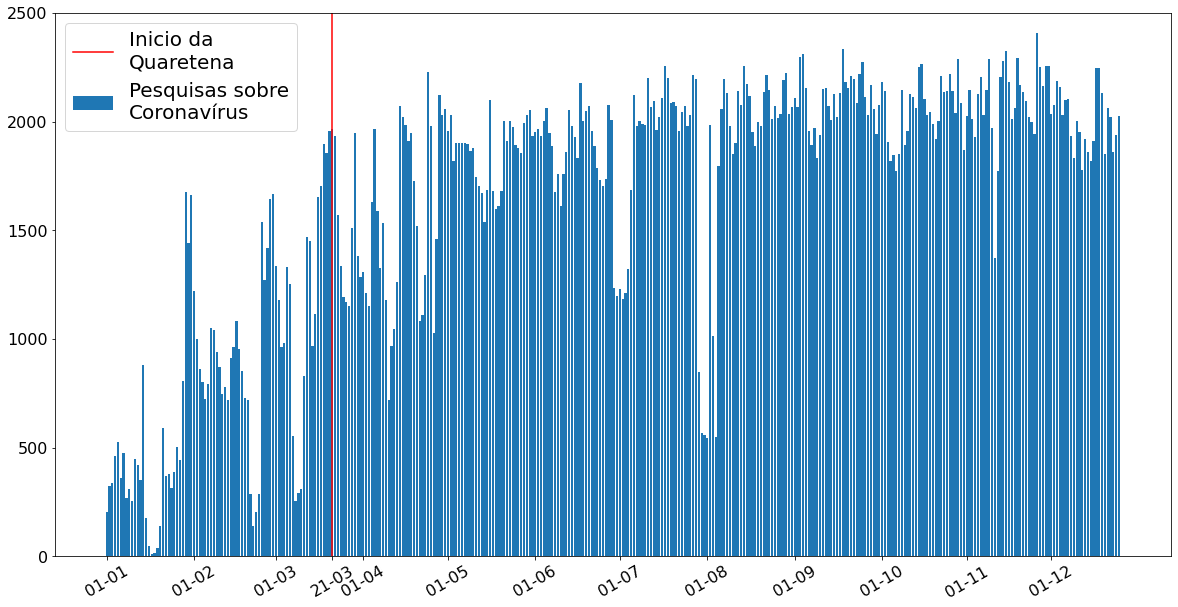

In [62]:
# Get index
indices = dia_pesquisa_corona.sum(axis='columns').index.values

# Get index, values and gradients    
x    = dia_pesquisa_corona.sum(axis='columns').index.values
y    = dia_pesquisa_corona.sum(axis='columns').values

# Plot line
plt.figure(figsize=(20,10))
plt.bar(x,y,label='Pesquisas sobre\nCoronavírus')

# Plot start quaretene
plt.plot([80,80], [0, 2500],label='Inicio da\nQuaretena', color='red')
plt.ylim(0.0, 2500)


# Plot legends and dates
plt.legend(loc='best', fontsize=20)
plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Com o gráfico acima podemos ver que teve um aumento nas pesquisas já no inicio do ano, especificamente no começo do mês de fevereiro. Com o decreto da quarentena houve um maior aumento, mas após os primeiros quinze dias do decreto (no qual foi a primeira imposição do governo) houve um estabelecimento do número de pesquisas diárias.